## **Análisis de la cesta de la compra para marketing de una panadería**


Vamos a realizar el análisis de la cesta de mercado basado en el conjunto de datos que pertenece a "The Bread Basket", una panadería ubicada en Edimburgo. El conjunto de datos tiene 20507 entradas, más de 9000 transacciones y 4 columnas.


Todas las empresas modernas, incluidas las tiendas online, analizan las transacciones de los clientes y las utilizan para formar una cesta de la compra, que en realidad es un conjunto de productos populares que se compran juntos.
Esta cesta se puede utilizar para planificar campañas de marketing, en particular para crear recomendaciones de compras, gama de productos, ubicación en los estantes de los supermercados o hacer ofertas promocionales.

Market Basket Analysis es una poderosa herramienta de marketing para convertir una gran cantidad de transacciones de clientes en reglas simples y fáciles de visualizar que se utilizan para promocionar un producto y generar recomendaciones de ventas.

Vamos a realizar el análisis de la cesta de la compra utilizando tanto métodos clásicos de visualización de datos como el algoritmo Apriori, indicadores estándar, reglas de asociación, agregación y poda. También se hará una visualización de las reglas asociativas en forma de gráfico dinámico.


Los datos estadísticos se obtuvieron de https://www.kaggle.com/mittalvasu95/the-bread-basket. Este DataSet se publica bajo licencia CC0: Dominio Público que permite fomentar la libre reutilización de sus datos, tanto para fines comerciales como no comerciales.


Se deben instalar bibliotecas como Pandas, MatplotLib, SeaBorn, mlxtend y pyvis.


In [ ]:
# conda install -c conda-forge pandas

In [ ]:
# conda install -c conda-forge matplotlib

In [ ]:
# conda install -c conda-forge seaborn

In [ ]:
# conda install -c conda-forge mlxtend

In [ ]:
# conda install -c conda-forge pyvis

## Download and pre-preparation of data


Algunas bibliotecas deben importarse antes de poder comenzar.


In [ ]:
!pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from pyvis.network import Network
import datetime as dt
import numpy as np

### Descarga y preparación de los datos


Descarguemos los datos de las transacciones de los clientes desde un archivo csv.


In [49]:
df = pd.read_csv("https://raw.githubusercontent.com/joraleziv/marketing_cesta_pan/main/bread%20basket.csv")
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
...,...,...,...,...,...
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend


Estudiemos el DataSet. Como puede ver, el conjunto de datos consta de 20507 filas y 5 columnas.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


La primera columna del DataSet es de tipo int64. Todos los demás son de tipo objeto.
El DataSet tiene las siguientes columnas:

1. Transacción: la identificación de la transacción que es única para cada pedido.
2. Artículo: una lista de artículos que el cliente debe ordenar/colocar
3. date_time: la fecha y hora de la transacción.
4. period_day: el período del día en que un cliente realizó/ordenó
5.weekday_weekend: es el día que es fin de semana (sábado o domingo) o día laborable.

Antes que nada necesitamos cambiar el tipo de datos de la columna fecha_hora.


In [ ]:
df['date_time']=pd.to_datetime(df['date_time'])
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Transaction      20507 non-null  int64         
 1   Item             20507 non-null  object        
 2   date_time        20507 non-null  datetime64[ns]
 3   period_day       20507 non-null  object        
 4   weekday_weekend  20507 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 801.2+ KB


Deberíamos agregar algunas columnas nuevas para el análisis visual básico de la cesta de mercado.

Para analizar la dinámica de compras durante diferentes períodos de tiempo, debemos dividir las columnas date_time en "time" y "hour".


In [ ]:
df['time']=df['date_time'].dt.time
df['hour']=df['date_time'].dt.hour

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Para analizar la dinámica de las compras durante el año, debemos agregar columnas con los números de los meses y sus nombres.


In [ ]:
df['month'] = df['date_time'].dt.month
df['month name'] = df['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Del mismo modo, para analizar las compras semanales es necesario resaltar los días de la semana y sus nombres.


In [ ]:
df['day'] = df['date_time'].dt.day
df['weekday'] = df['date_time'].dt.weekday
df['weekday name'] = df['weekday'].replace([0,1,2,3,4,5,6], ['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Analicemos el DataSet final:


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend,time,hour,month,month name,day,weekday,weekday name
0,1,Bread,2016-10-30 09:58:00,morning,weekend,09:58:00,9,10,Octubre,30,6,Domingo
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10:05:00,10,10,Octubre,30,6,Domingo
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10:05:00,10,10,Octubre,30,6,Domingo
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10:07:00,10,10,Octubre,30,6,Domingo
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10:07:00,10,10,Octubre,30,6,Domingo
...,...,...,...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:00,afternoon,weekend,14:32:00,14,9,Septiembre,4,0,Lunes
20503,9682,Tea,2017-09-04 14:32:00,afternoon,weekend,14:32:00,14,9,Septiembre,4,0,Lunes
20504,9683,Coffee,2017-09-04 14:57:00,afternoon,weekend,14:57:00,14,9,Septiembre,4,0,Lunes
20505,9683,Pastry,2017-09-04 14:57:00,afternoon,weekend,14:57:00,14,9,Septiembre,4,0,Lunes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Transaction      20507 non-null  int64         
 1   Item             20507 non-null  object        
 2   date_time        20507 non-null  datetime64[ns]
 3   period_day       20507 non-null  object        
 4   weekday_weekend  20507 non-null  object        
 5   time             20507 non-null  object        
 6   hour             20507 non-null  int64         
 7   month            20507 non-null  int64         
 8   month name       20507 non-null  object        
 9   day              20507 non-null  int64         
 10  weekday          20507 non-null  int64         
 11  weekday name     20507 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 1.9+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Tenemos 11 columnas con toda la información necesaria para el análisis visual preliminar de la cesta de la compra.


## Visualización de los Datos


Analicemos las 20 compras más populares.


In [ ]:
popular = df['Item'].value_counts()
(df['Item'].value_counts(normalize=True)*100).head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coffee           26.678695
Bread            16.213976
Tea               6.997611
Cake              4.998293
Pastry            4.174184
Sandwich          3.759692
Medialuna         3.003852
Hot chocolate     2.877066
Cookies           2.633247
Brownie           1.848149
Farm House        1.823767
Muffin            1.804262
Alfajores         1.799386
Juice             1.799386
Soup              1.667723
Scone             1.594577
Toast             1.550690
Scandinavian      1.350758
Truffles          0.941142
Coke              0.902131
Name: Item, dtype: float64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


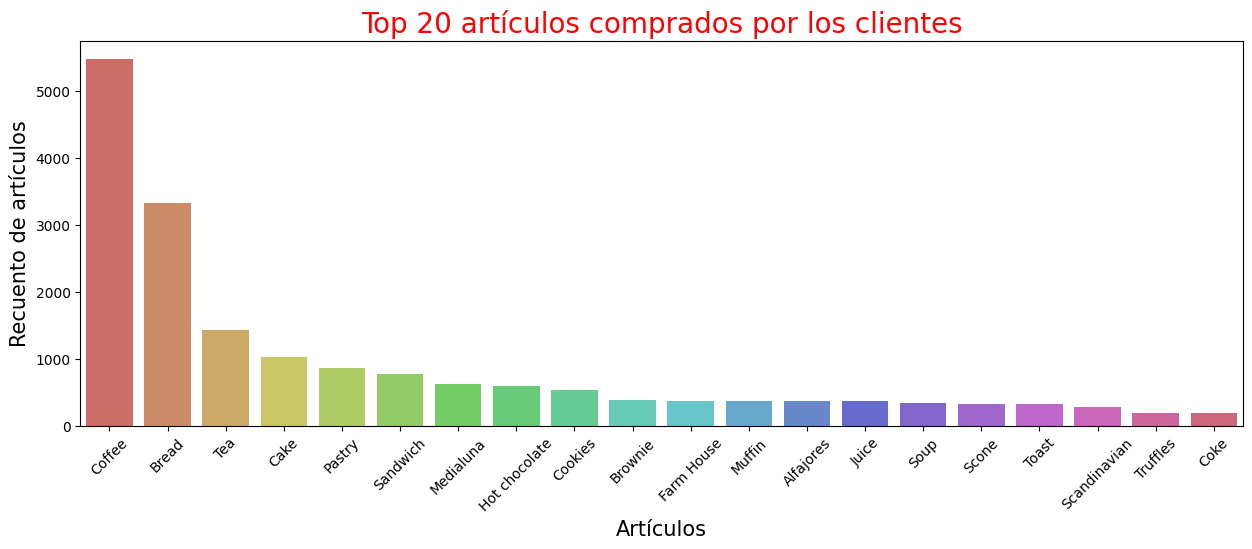

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x = popular.head(20).index, y = popular.head(20).values, palette = 'hls')
plt.xlabel('Artículos', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Recuento de artículos', size = 15)
plt.title('Top 20 artículos comprados por los clientes', color = 'red', size = 20)
plt.show()

Como se puede observar, la compra más popular (26%) es el Café, le sigue el Pan (16%) y luego el Té (6,99%).


Analicemos la dinámica de las compras mensuales. Para una clasificación correcta, debemos agrupar el conjunto de datos por número de mes, pero mostrarlo en el gráfico por nombre de mes.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


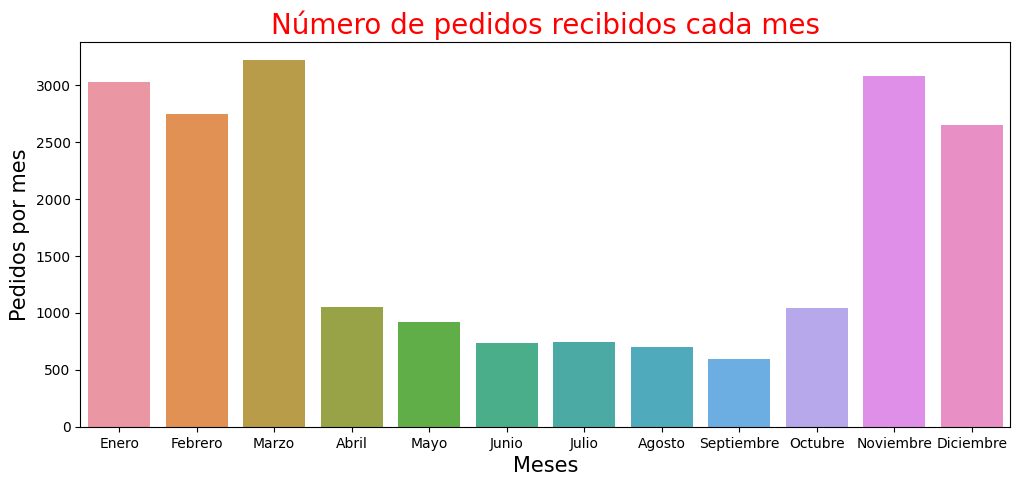

In [ ]:
monthTran = df.groupby(['month','month name'])['Transaction'].count().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data = monthTran[['month name', 'Transaction']], x = "month name", y = "Transaction")
plt.xlabel('Meses', size = 15)
plt.ylabel('Pedidos por mes', size = 15)
plt.title('Número de pedidos recibidos cada mes', color = 'red', size = 20)
plt.show()

Como se puede observar, el mayor número de compras corresponde a marzo y noviembre. Además, los compradores más activos se encuentran en invierno. En verano y principios de otoño, la actividad es más baja.


Analicemos las compras mensuales de los seis productos más populares.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


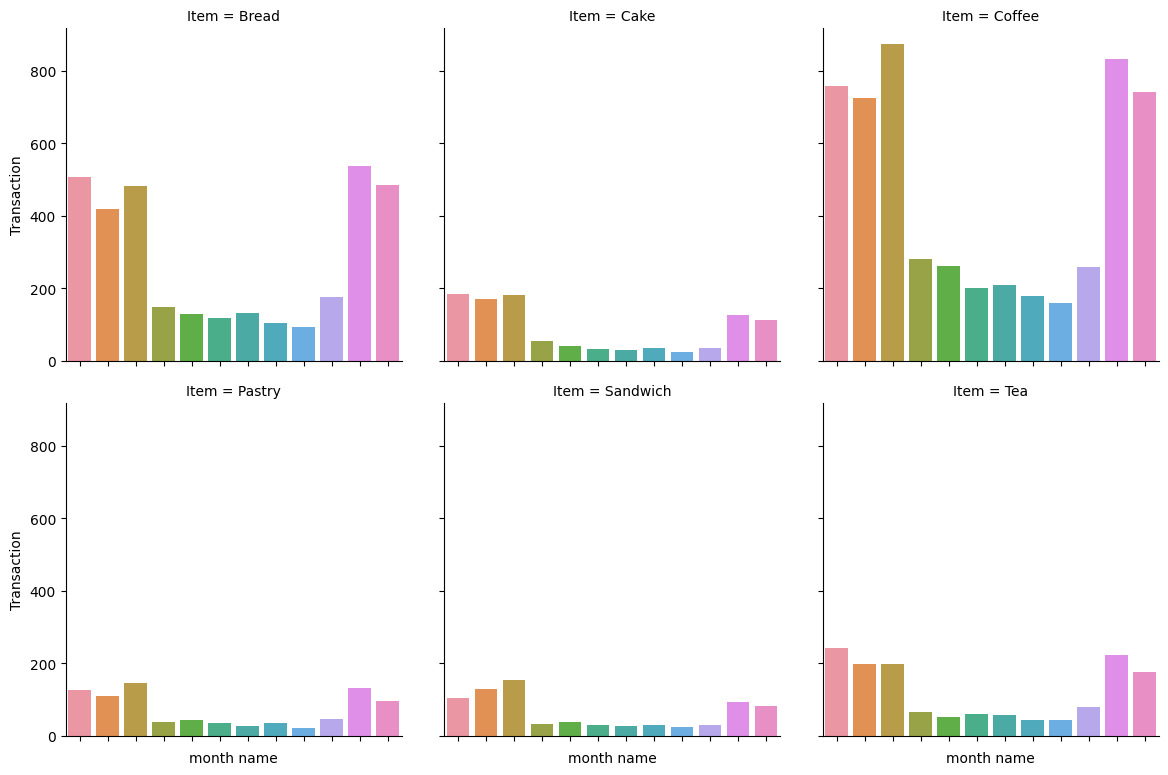

In [ ]:
monthTranTransaction = df[df.Item.isin(popular.head(6).index)].groupby(['month','month name','Item'])['Transaction'].count().reset_index()

ax = sns.catplot(x="month name", y="Transaction",
                  col="Item",
                 data=monthTranTransaction, kind="bar",
                 height=4,  col_wrap=3)
ax.set_xticklabels(rotation=45)

Analicemos la actividad semanal.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


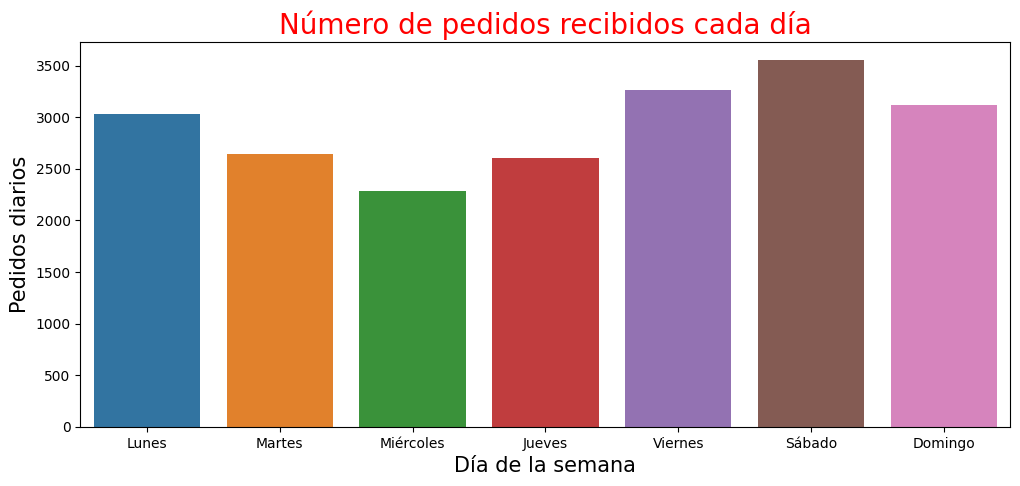

In [ ]:
weekTran = df.groupby(['weekday','weekday name'])['Transaction'].count().reset_index()

plt.figure(figsize=(12,5))
sns.barplot(data = weekTran[['weekday name', 'Transaction']], x = "weekday name", y = "Transaction")
plt.xlabel('Día de la semana', size = 15)
plt.ylabel('Pedidos diarios', size = 15)
plt.title('Número de pedidos recibidos cada día', color = 'red', size = 20)
plt.show()

Como puede ver en el gráfico, los compradores están activos durante toda la semana. No hay días sin compras. Puedes ver que el número máximo de compras cae el sábado.

Analicemos de manera similar los seis productos más populares.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


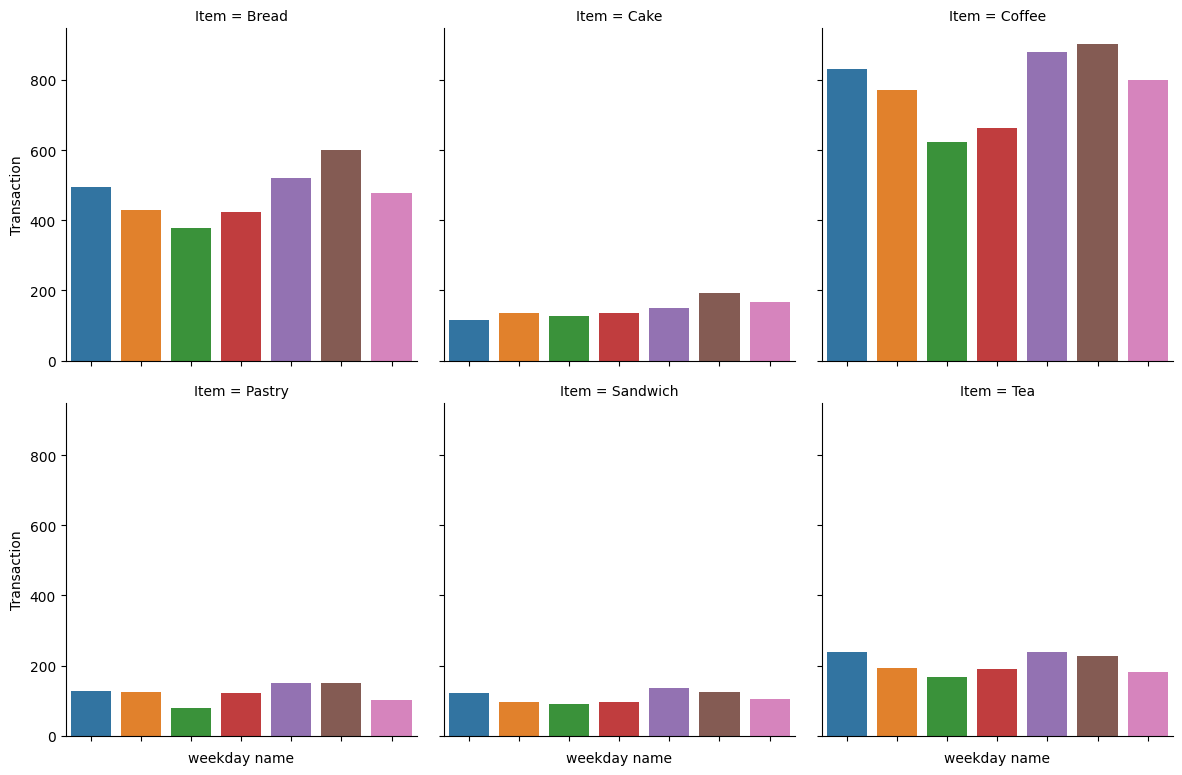

In [ ]:
weekTran = df[df.Item.isin(popular.head(6).index)].groupby(['weekday','weekday name', 'Item'])['Transaction'].count().reset_index()

ax = sns.catplot(x="weekday name", y="Transaction",
                  col="Item",
                 data=weekTran, kind="bar",
                 height=4,  col_wrap=3)
ax.set_xticklabels(rotation=45)

Analicemos la proporción de compras los fines de semana y entre semana.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


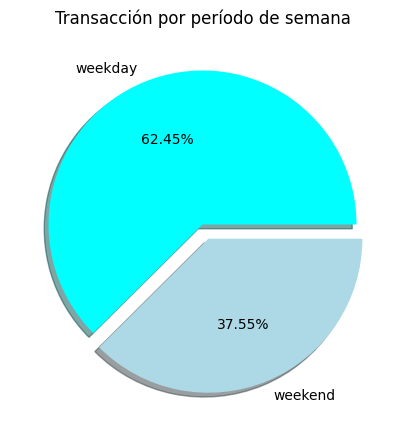

In [ ]:
size = df['weekday_weekend'].value_counts()
labels = size.index.values
colors = ["cyan", "lightblue"]
explode = [0, 0.1]

plt.figure(figsize=(12,5))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('Transacción por período de semana')
plt.show()

Puedes ver que el 62% de las compras se realizan entre semana y el 37% se realizan en fin de semana.


De manera similar al ejercicio de la primera práctica de laboratorio, creemos gráficos circulares para los cuatro productos más populares.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


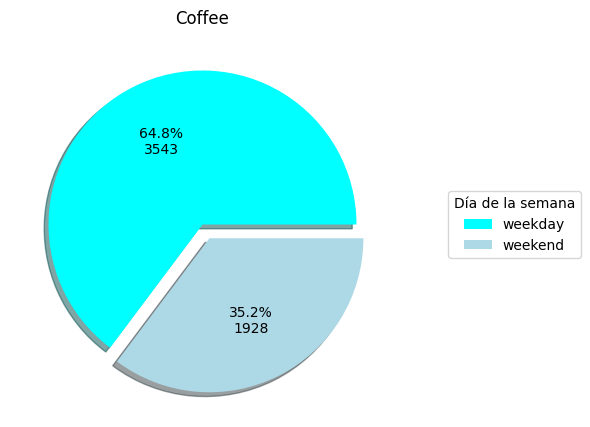

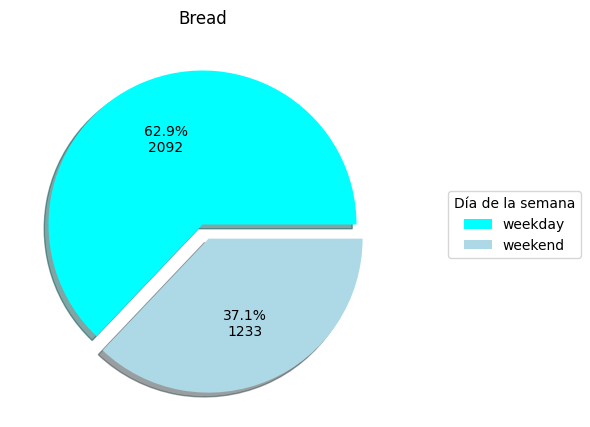

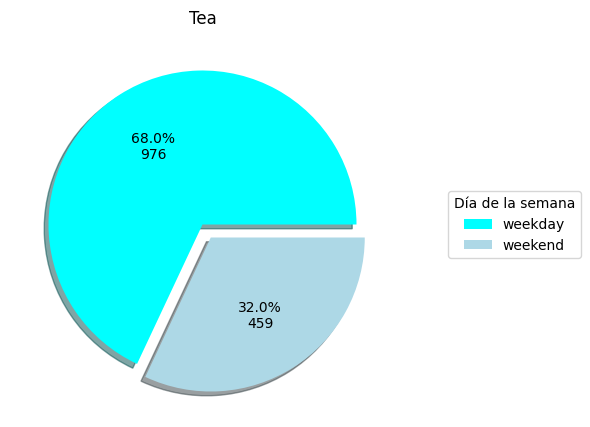

In [ ]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n{:d}".format(pct, absolute)

size = df[df.Item.isin(popular.head(6).index)]
size = pd.crosstab(size['weekday_weekend'],
              size['Item'])
# size
labels = size.index.values
colors = ["cyan", "lightblue"]


for e in popular.head(3).index:
    plt.figure(figsize=(12,5))
    dt = size[e]
    explode = [0, 0.1]
    plt.pie(dt, colors = colors, explode = explode, shadow = True,
            autopct=lambda pct: func(pct, dt.values))

    plt.title(e)
    plt.legend(labels = labels, title="Día de la semana",
          loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

También es interesante estudiar la actividad de los consumidores durante el día.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


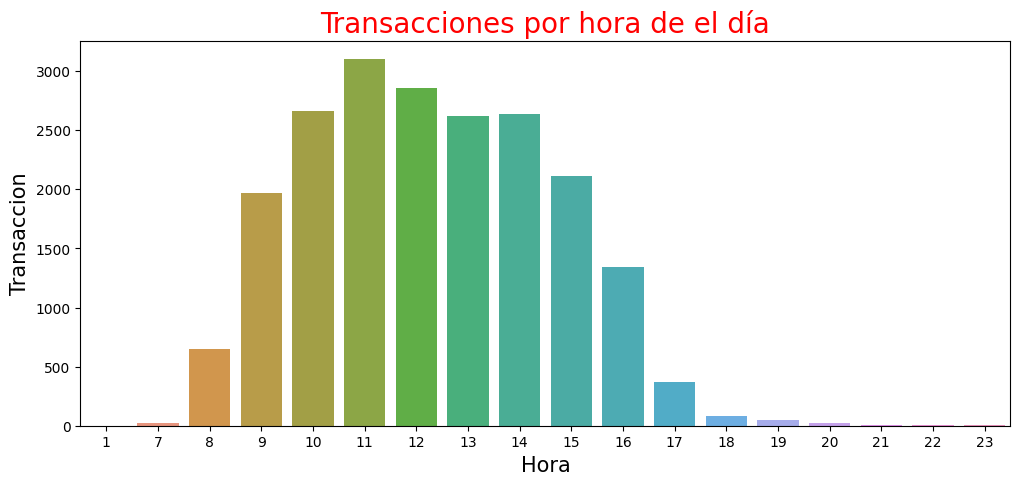

In [ ]:
coutbyhour=df.groupby('hour')['Transaction'].count().reset_index()
coutbyhour.sort_values('hour',inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data=coutbyhour, x='hour', y='Transaction')
plt.xlabel('Hora', size = 15)
plt.ylabel('Transaccion', size = 15)
plt.title('Transacciones por hora de el día', color = 'red', size = 20)
plt.show()

Se ve claramente que los consumidores se vuelven más activos desde las 9 de la mañana hasta las 4 de la tarde.


Analicemos la actividad de los compradores durante partes del día. Esta información es el DataSet inicial. Todo lo que necesita hacer es agregar su propio orden de clasificación para mostrar las columnas del gráfico correctamente.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


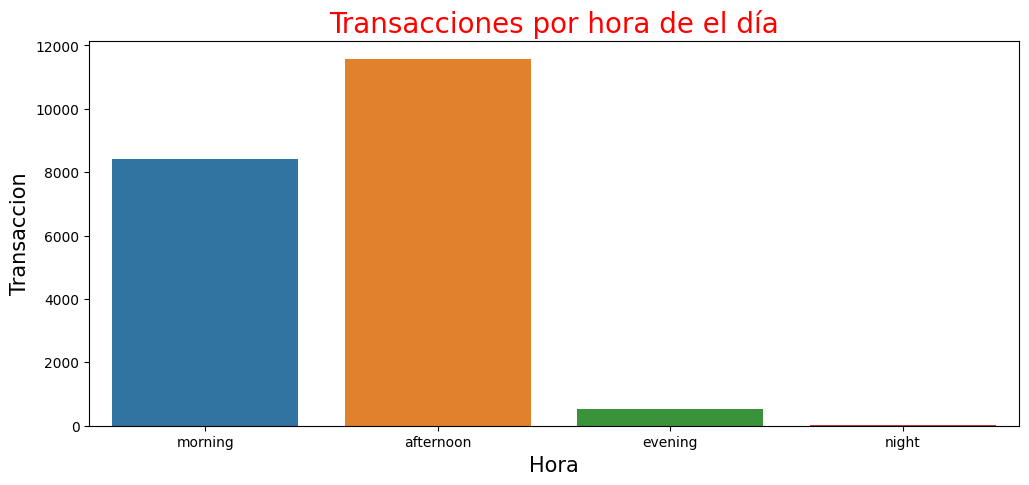

In [ ]:
coutbyweekday=df.groupby('period_day')['Transaction'].count().reset_index()
coutbyweekday.loc[:,"dayorder"] = [1, 2, 0, 3]
coutbyweekday.sort_values("dayorder",inplace=True)
plt.figure(figsize=(12,5))
sns.barplot(data=coutbyweekday, x='period_day', y='Transaction')
plt.xlabel('Hora', size = 15)
plt.ylabel('Transaccion', size = 15)
plt.title('Transacciones por hora de el día', color = 'red', size = 20)
plt.show()

El gráfico confirma que los compradores se vuelven más activos durante la tarde.


## Reglas de asociación


Definir la relación entre las compras es necesario para construir reglas de asociación. Para ello, es necesario transformar la transacción DataSet en una tabla especial. Las columnas de esta tabla contienen tipos de compras y las filas son transacciones. Las celdas de esta tabla deben ser booleanas (verdadero/falso).
Hay dos formas más comunes de hacer esto.


### Forma 1. Tabla dinámica


Esta forma implica el uso de métodos pandas clásicos como pivot_table y group_by.

En primer lugar, agrupamos filas en transacciones:


In [ ]:
transactions = df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
...,...,...,...
18882,9682,Tacos/Fajita,1
18883,9682,Tea,1
18884,9683,Coffee,1
18885,9683,Pastry,1


Luego, transformamos este conjunto de datos mediante pivot_table en una estructura de cesta de la compra necesaria:


In [ ]:
basket = transactions.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)
basket

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


A continuación, cambiamos los datos distintos de cero a **Verdaderos** y los datos cero a **Falso**:


In [ ]:
def encode_units(x):
    if(x==0):
        return False
    if(x>0):
        return True

basket_sets = basket.applymap(encode_units)
basket_sets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Este es un DataSet de cesta de mercado necesario que contiene información sobre 9465 clientes y 94 tipos de compras.


### Forma 2. Usando el marco mlxtend


La biblioteca clásica de aprendizaje automático scikit-learn no contiene funciones de reglas de asociación. Por eso usaremos el **[mlxtend](http://rasbt.github.io/mlxtend/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0R8UEN306-2022-01-01)** (extensiones de aprendizaje automático) marco. Es una biblioteca Python de útiles herramientas de aprendizaje automático.

En primer lugar, creamos una lista de transacciones, cada una de las cuales es una lista de compras.


In [ ]:
transactions=[]
for item in df['Transaction'].unique():
    lst=list(set(df[df['Transaction']==item]['Item']))
    transactions.append(lst)

transactions[0:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['Bread'],
 ['Scandinavian'],
 ['Jam', 'Cookies', 'Hot chocolate'],
 ['Muffin'],
 ['Bread', 'Pastry', 'Coffee'],
 ['Muffin', 'Pastry', 'Medialuna'],
 ['Coffee', 'Pastry', 'Medialuna', 'Tea'],
 ['Bread', 'Pastry'],
 ['Muffin', 'Bread'],
 ['Scandinavian', 'Medialuna']]

Entonces podemos obtener fácilmente un DataSet de cesta de la compra usando **[TransactionEncoder()](http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0R8UEN306-2022-01-01#transactionencoder)**.


In [ ]:
te = TransactionEncoder()
encodedData = te.fit(transactions).transform(transactions)
basket_sets_2 = pd.DataFrame(encodedData, columns=te.columns_)
basket_sets_2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9461,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Como puede ver, obtuvimos el mismo conjunto de datos.

Ahora, cuando los datos están estructurados correctamente, podemos generar conjuntos de elementos frecuentes para la minería de reglas de asociación que tengan un soporte adecuado (1% en nuestro caso) usando **[apriori()](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0R8UEN306-2022-01-01)**.

Apriori es un algoritmo popular para extraer conjuntos de elementos frecuentes con aplicaciones en el aprendizaje de reglas de asociación. El algoritmo a priori ha sido diseñado para operar sobre bases de datos que contienen transacciones, como compras de clientes de una tienda. Un conjunto de elementos se considera "frecuente" si alcanza un umbral de soporte especificado por el usuario. Por ejemplo, si el umbral de soporte se establece en 0,5 (50%), un conjunto de elementos frecuentes se define como un conjunto de elementos que ocurren juntos en al menos el 50% de todas las transacciones en la base de datos.


In [ ]:
frequentItems= apriori(basket_sets, use_colnames=True, min_support=0.01)
frequentItems.sort_values("support", ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
6,0.478394,(Coffee)
2,0.327205,(Bread)
26,0.142631,(Tea)
4,0.103856,(Cake)
34,0.090016,"(Bread, Coffee)"
...,...,...
11,0.010565,(Hearty & Seasonal)
20,0.010460,(Salad)
30,0.010354,"(Bread, Alfajores)"
58,0.010037,"(Bread, Coffee, Cake)"


Como puedes ver, el café puro se elige en el 48% de los casos. Café y pan - en un 9%. Ensalada - al 1%. Esta lista es necesaria para crear reglas de asociación usando la función **[association_rules()](http://rasbt.github.io/mlxtend/api_modules/mlxtend.frequent_patterns/association_rules/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0R8UEN306-2022-01-01#association_rules)** que genera un DataFrame de reglas de asociación que incluyen las puntuaciones de las métricas.


La generación de reglas es una tarea común en la extracción de patrones frecuentes. Una regla de asociación es una expresión de implicación de la forma X→Y, donde X e Y son conjuntos de elementos disjuntos. Un ejemplo más concreto basado en el comportamiento del consumidor sería {Coffee}→{Bread}
 lo que sugiere que es probable que las personas que compran café también compren pan. Para evaluar el "interés" de dicha regla de asociación, se han desarrollado diferentes métricas. La implementación actual hace uso de las métricas de confianza y elevación.


### Métricas


Las métricas admitidas actualmente para evaluar las reglas de asociación y establecer umbrales de selección se enumeran a continuación. Dada una regla "A → C", A representa antecedente y C representa consecuente.


_Soporte_

La métrica de soporte se define para conjuntos de elementos, no para reglas de asociación. La tabla producida por el algoritmo de minería de reglas de asociación contiene tres métricas de soporte diferentes: "soporte antecedente", "soporte consecuente" y "soporte". Aquí, el 'soporte antecedente' calcula la proporción de transacciones que contienen el antecedente A, y el 'soporte consecuente' calcula el soporte para el conjunto de elementos del consecuente C. La métrica de 'soporte' luego calcula el soporte del conjunto de elementos combinado A∪C - tenga en cuenta que el 'apoyo' depende del 'apoyo antecedente' y del 'apoyo consiguiente' a través de min('apoyo antecedente', 'apoyo consecuente').

Normalmente, el soporte se utiliza para medir la abundancia o frecuencia (a menudo interpretada como significado o importancia) de un conjunto de elementos en una base de datos. Nos referimos a un conjunto de elementos como "conjunto de elementos frecuentes" si su soporte es mayor que un umbral de soporte mínimo especificado. Tenga en cuenta que, en general, debido a la propiedad de cierre descendente, todos los subconjuntos de un conjunto de elementos frecuentes también lo son.


_Confianza_

La confianza de una regla A->C es la probabilidad de ver el consecuente en una transacción dado que también contiene el antecedente. Tenga en cuenta que la métrica no es simétrica ni dirigida; por ejemplo, la confianza para A->C es diferente a la confianza para C->A. La confianza es 1 (máxima) para una regla A->C si el consecuente y el antecedente siempre ocurren juntos.


_Elevación_

La métrica de elevación se usa comúnmente para medir con cuánta más frecuencia el antecedente y el consecuente de una regla A->C ocurren juntos de lo que esperaríamos si fueran estadísticamente independientes. Si A y C son independientes, la puntuación de elevación será exactamente 1.


_Apalancamiento_

El apalancamiento calcula la diferencia entre la frecuencia observada de que A y C aparezcan juntos y la frecuencia que se esperaría si A y C fueran independientes. Un valor de apalancamiento de 0 indica independencia.


_Convicción_

Un valor de convicción alto significa que el consecuente depende en gran medida del antecedente. Por ejemplo, en el caso de una puntuación de confianza perfecta, el denominador pasa a ser 0 (debido a 1 - 1), por lo que la puntuación de convicción se define como "inf". Similar al levantamiento, si los elementos son independientes, la convicción es 1.


In [ ]:
rules = association_rules(frequentItems, metric="confidence", min_threshold=0.2)
rules.sort_values('confidence', ascending = False, inplace=True)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
24,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
22,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
16,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
18,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
15,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
19,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
11,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
20,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
13,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700


Este conjunto de datos contiene todas las relaciones causales posibles.

Veamos todas las reglas que tienen elevación>1:


In [ ]:
rules[rules["lift"]>1].sort_values("support",ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
18,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
19,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
16,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
14,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
8,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
13,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
12,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
24,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
15,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738


Imagine una situación en la que un cliente compra un pastel. Predigamos qué más pueden comprar:


In [ ]:
rules[rules['antecedents'] == frozenset({'Cake'})]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
12,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
3,(Cake),(Bread),0.103856,0.327205,0.023349,0.224822,0.687097,-0.010633,0.867923,-0.336947


Como puedes ver, hay tres opciones posibles:
1. Café - 47%
2. Té - 14%
3. Pan - 3%


Esta puede ser una recomendación de qué producto se debe colocar más cerca o más lejos del pastel en los estantes. Dependiendo de la estrategia del supermercado.


Analicemos qué productos se compran juntos con más frecuencia.


In [ ]:
frequentItems["antecedent_len"] = frequentItems["itemsets"].apply(lambda x: len(x))
frequentItems[frequentItems["antecedent_len"]>1].sort_values(by=["antecedent_len","support"], ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,antecedent_len
59,0.011199,"(Bread, Pastry, Coffee)",3
58,0.010037,"(Bread, Coffee, Cake)",3
60,0.010037,"(Coffee, Cake, Tea)",3
34,0.090016,"(Bread, Coffee)",2
42,0.054728,"(Coffee, Cake)",2
55,0.049868,"(Coffee, Tea)",2
50,0.047544,"(Pastry, Coffee)",2
51,0.038246,"(Sandwich, Coffee)",2
48,0.035182,"(Coffee, Medialuna)",2
46,0.029583,"(Coffee, Hot chocolate)",2


La confianza para un consecuente muy frecuente siempre es alta incluso si existe una asociación muy débil. Entonces, esto no nos da una imagen más clara. Aquí el café es, con diferencia, el producto más frecuente y el más vendido. Por lo tanto, se puede recomendar de todos modos con cualquier otro producto. Por lo tanto, podemos eliminar las reglas que recomiendan el café para obtener una imagen más clara de las reglas reales desconocidas generadas a partir de los datos.


In [ ]:
index_names = rules['consequents'] == frozenset({'Coffee'})
refinedRules = rules[~index_names].sort_values('lift', ascending=False)
refinedRules.drop(['leverage','conviction'], axis=1, inplace=True)
refinedRules = refinedRules.reset_index()
refinedRules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,zhangs_metric
0,29,"(Coffee, Tea)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.509401
1,12,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.420538
2,25,(Sandwich),(Tea),0.071844,0.142631,0.014369,0.200000,1.402222,0.309050
3,8,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.036980
4,0,(Alfajores),(Bread),0.036344,0.327205,0.010354,0.284884,0.870657,-0.133570
5,7,(Medialuna),(Bread),0.061807,0.327205,0.016904,0.273504,0.835879,-0.173062
6,2,(Brownie),(Bread),0.040042,0.327205,0.010777,0.269129,0.822508,-0.183536
7,5,(Cookies),(Bread),0.054411,0.327205,0.014474,0.266019,0.813004,-0.195651
8,9,(Sandwich),(Bread),0.071844,0.327205,0.017010,0.236765,0.723596,-0.291561
9,28,"(Pastry, Coffee)",(Bread),0.047544,0.327205,0.011199,0.235556,0.719901,-0.290026


Ahora se ve más claramente la relación entre otros tipos de productos, como Pastel -> Té o (Té y Café) -> Pastel


## Visualización de reglas de asociación


Una cuestión importante en el análisis y la comprensión de las reglas asociativas es la posibilidad de su visualización. Hay varios enfoques para esto. Sin embargo, lo más claro y obvio es el uso de la biblioteca. **[pyvis](https://pyvis.readthedocs.io/en/latest/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0R8UEN306-2022-01-01)**. Este es un marco especial para visualizaciones de redes interactivas.


Primero que nada, deberíamos crear un pyvis. **[Network()](https://pyvis.readthedocs.io/en/latest/documentation.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0R8UEN306-2022-01-01&highlight=Network#pyvis.network.Network)**. La clase Network es el foco de esta biblioteca. Toda la funcionalidad de pyvis debe implementarse desde una instancia de red.


In [ ]:
Basket_Network = Network(height="1000px", width="1000px", directed=True, notebook=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Entonces deberíamos elegir el tipo de red pyvis. Hay varios tipos como: **[force_atlas_2based()](https://pyvis.readthedocs.io/en/latest/documentation.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0R8UEN306-2022-01-01&highlight=repulsion#pyvis.network.Network.repulsion)**, **[barnes_hut()](https://pyvis.readthedocs.io/en/latest/documentation.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0R8UEN306-2022-01-01&highlight=repulsion#pyvis.network.Network.repulsion)**, **[hrepulsion()](https://pyvis.readthedocs.io/en/latest/documentation.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0R8UEN306-2022-01-01&highlight=repulsion#pyvis.network.Network.repulsion)**, **[repulsion()](https://pyvis.readthedocs.io/en/latest/documentation.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0R8UEN306-2022-01-01&highlight=repulsion#pyvis.network.Network.repulsion)**, **[etc](https://pyvis.readthedocs.io/en/latest/documentation.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0R8UEN306-2022-01-01&highlight=repulsion#pyvis.network.Network.repulsion)**.


In [ ]:
# Basket_Network.force_atlas_2based()
# Basket_Network.barnes_hut()
# Basket_Network.hrepulsion()
Basket_Network.repulsion()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Entonces deberíamos crear nodos. (**[add_node()](https://pyvis.readthedocs.io/en/latest/documentation.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0R8UEN306-2022-01-01&highlight=add_node#pyvis.network.Network.add_node)**) y eges (**[add_edge()](https://pyvis.readthedocs.io/en/latest/documentation.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0R8UEN306-2022-01-01&highlight=add_edge#pyvis.network.Network.add_edge)**) Entre ellos para un gráfico pyvis basado en reglas:


In [ ]:
Basket_Network_Data_zip=zip(rules["antecedents"],
                            rules["consequents"],
                            rules["antecedent support"],
                            rules["consequent support"],
                            rules["confidence"])

for i in Basket_Network_Data_zip:
    FromItem=str(i[0]).replace("frozenset({'","").replace("'})","").replace("',　'",",")
    ToItem=str(i[1]).replace("frozenset({'","").replace("'})","").replace("',　'",",")
    FromWeight=i[2]
    ToWeight=i[3]
    EdgeWeight=i[4]

    Basket_Network.add_node(n_id=FromItem, shape="dot", value=FromWeight,
                            title=FromItem + "<br>Support: " + str(FromWeight))
    Basket_Network.add_node(n_id=ToItem, shape="dot", value=ToWeight,
                           title=ToItem + "<br>Support: " + str(ToWeight))
    Basket_Network.add_edge(source=FromItem, to=ToItem, value=EdgeWeight, arrowStrikethrough=False,
                            title=FromItem + " --> " + ToItem + "<br>Confidence:" + str(EdgeWeight))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Entonces deberíamos suavizar los bordes. (**[set_edge_smooth](https://pyvis.readthedocs.io/en/latest/documentation.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0R8UEN306-2022-01-01&highlight=set_edge_smooth#pyvis.network.Network.set_edge_smooth)**) y establecer los parámetros de visualizaciones como **[toggle_hide_edges_on_drag](https://pyvis.readthedocs.io/en/latest/documentation.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0R8UEN306-2022-01-01&highlight=toggle_hide_edges_on_drag#pyvis.network.Network.toggle_hide_edges_on_drag)**.


In [ ]:
Basket_Network.set_edge_smooth(smooth_type="continuous")
Basket_Network.toggle_hide_edges_on_drag(True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


El último paso: guardamos el gráfico en un archivo y lo visualizamos usando **[save_graph()](https://pyvis.readthedocs.io/en/latest/documentation.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0R8UEN306-2022-01-01&highlight=save_graph#pyvis.network.Network.save_graph)** y **[show()](https://pyvis.readthedocs.io/en/latest/documentation.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0R8UEN306-2022-01-01&highlight=show#pyvis.network.Network.show)**.


In [45]:
Basket_Network.save_graph("Basket_Network1.html")
Basket_Network.show("Basket_Network1.html")

Basket_Network1.html


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
Basket_Network.save_graph("Basket_Network1.html")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Como puede ver, el gráfico le permite comprender fácilmente todas las carreras juntas. El ancho de las líneas muestra la confianza de la regla, el tamaño del nodo indica el apoyo.


Hagamos lo mismo con las reglas refinadas:


In [48]:
Basket_Network2 = Network(height="1000px", width="1000px", directed=True, notebook=True)
Basket_Network2.repulsion()
Basket_Network_Data2_zip=zip(refinedRules["antecedents"], refinedRules["consequents"], refinedRules["antecedent support"], refinedRules["consequent support"], refinedRules["confidence"])


for i in Basket_Network_Data2_zip:
    FromItem=str(i[0]).replace("frozenset({'","").replace("'})","").replace("',　'",",")
    ToItem=str(i[1]).replace("frozenset({'","").replace("'})","").replace("',　'",",")
    FromWeight=i[2]
    ToWeight=i[3]
    EdgeWeight=i[4]

    Basket_Network2.add_node(n_id=FromItem, shape="dot", value=FromWeight,
                            title=FromItem + "<br>Support: " + str(FromWeight))
    Basket_Network2.add_node(n_id=ToItem, shape="dot", value=ToWeight,
                           title=ToItem + "<br>Support: " + str(ToWeight))
    Basket_Network2.add_edge(source=FromItem, to=ToItem, value=EdgeWeight, arrowStrikethrough=False,
                            title=FromItem + " --> " + ToItem + "<br>Confidence:" + str(EdgeWeight))

Basket_Network2.set_edge_smooth(smooth_type="continuous")
Basket_Network2.toggle_hide_edges_on_drag(True)
Basket_Network2.save_graph("Basket_Network2.html")
Basket_Network2.show("Basket_Network2.html")

Basket_Network2.html


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
